[View in Colaboratory](https://colab.research.google.com/github/rishabh-vij/Fast.ai_MOOC/blob/master/Week%206/Gradient_descent_pytorch_self.ipynb)

In [0]:
#!pip install opencv-python
#!apt update && apt install -y libsm6 libxext6
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl 
! pip3 install fastai
#!pip3 install torchvision
#! pip install torchtext

## Gradient descent and Linear regresson from scratch with pytorch
**The goal of linear regression is to fit a line to a set of points.**

In [0]:
%matplotlib inline
from fastai.learner import *


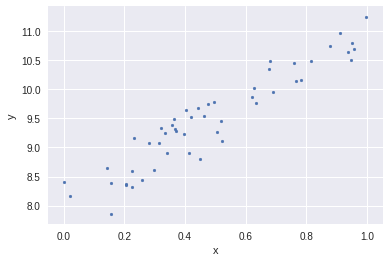

In [3]:
# Here we generate some fake data
def lin(a,b,x): return a*x+b

def gen_fake_data(n, a, b):
    x = s = np.random.uniform(0,1,n) 
    y = lin(a,b,x) + 0.1 * np.random.normal(0,3,n)
    return x, y

x, y = gen_fake_data(50, 3., 8.)
plt.scatter(x,y, s=8); plt.xlabel("x"); plt.ylabel("y");

 **We want to find parameters (weights) $a$ and $b$ such that we minimize the error between the points and the line $a\cdot x + b$. Note that here $a$ and $b$ are unknown. For a regression problem the most common error function or loss function is the mean squared error.**
 
 
**Suppose we believe $a = 10$ and $b = 5$ then we can compute y_hat which is our prediction and then compute our error.**


In [7]:
def mse(y_hat, y): return ((y_hat - y) ** 2).mean()

y_hat = lin(10,5,x)
mse(y_hat, y)

3.6313905096639107

In [9]:
def mse_loss(a, b, x, y): return mse(lin(a,b,x), y) # This step is the same as above block
mse_loss(10,5,x,y)


3.6313905096639107

**Now that we've our linear regression function(lin) and loss function(mse_loss) defined, we need an optimizer that finds best values for $a$ and $b$  **

##Gradient Descent optimizer

**For a fixed dataset $x$ and $y$ mse_loss(a,b) is a function of $a$ and $b$. We would like to find the values of $a$ and $b$ that minimize that function.**

**Gradient descent is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.**

In [39]:
#Let's start by generating a little bigger data
x,y=gen_fake_data(10000,3.0,8.0)
x.shape,y.shape,type(x),type(y)

((10000,), (10000,), numpy.ndarray, numpy.ndarray)

In [0]:
x,y=V(x),V(y) #converting np.ndarray into pytorch variables. P.S: This step is not needed after pytorch v0.4

In [41]:
a=V(np.random.randn(1),requires_grad=True)
b=V(np.random.randn(1),requires_grad=True) #starting with random a and b weights of type pytorch variable
a,b

(Variable containing:
 -2.4541
 [torch.cuda.FloatTensor of size 1 (GPU 0)], Variable containing:
 -1.0557
 [torch.cuda.FloatTensor of size 1 (GPU 0)])

In [42]:
lr=1e-3
for t in range(10000):    # Forward pass: compute predicted y using operations on Variables
  loss=mse_loss(a,b,x,y)
  if (t%1000==0): print(loss.data[0]) 
  
  # Computes the gradient of loss with respect to all Variables with requires_grad=True.
  # After this call a.grad and b.grad will be Variables holding the gradient
  # of the loss with respect to a and b respectively
  loss.backward()
  
  
  # Update a and b using gradient descent; a.data and b.data are Tensors,
  # a.grad and b.grad are Variables and a.grad.data and b.grad.data are Tensors
  a.data= a.data-lr*a.grad.data
  b.data= b.data-lr*b.grad.data
  
  # Zero the gradients
  a.grad.data.zero_()
  b.grad.data.zero_()


141.51861572265625
0.9813310503959656
0.10777968913316727
0.09989085048437119
0.09793990105390549
0.09646869450807571
0.09533698856830597
0.0944683626294136
0.0938015878200531
0.09328839927911758


In [48]:
a,b

(Variable containing:
  2.8795
 [torch.cuda.FloatTensor of size 1 (GPU 0)], Variable containing:
  8.0599
 [torch.cuda.FloatTensor of size 1 (GPU 0)])

## Gradient Descent for Classification with pytorch
**Everything stays same as above, only we change the loss function for our classification problem**


In [0]:
def gen_fake_data2(n, a, b):
    x = s = np.random.uniform(0,1,n) 
    y = lin(a,b,x) + 0.1 * np.random.normal(0,3,n)
    return x, np.where(y>10, 1, 0).astype(np.float32)

In [0]:
x,y = gen_fake_data2(10000, 3., 8.)
x,y = V(x),V(y)

In [71]:
x.shape,y.shape

(torch.Size([10000]), torch.Size([10000]))

In [0]:
def nll(y_hat, y):
    y_hat = torch.clamp(y_hat, 1e-5, 1-1e-5)
    return (y*y_hat.log() + (1-y)*(1-y_hat).log()).mean()

In [0]:
a = V(np.random.randn(1), requires_grad=True)
b = V(np.random.randn(1), requires_grad=True)

In [101]:
a,b

(Variable containing:
 -1.5738
 [torch.cuda.FloatTensor of size 1 (GPU 0)], Variable containing:
  0.9355
 [torch.cuda.FloatTensor of size 1 (GPU 0)])

In [102]:
lr = 1e-2
for t in range(3000):
    p = (-lin(a,b,x)).exp()
    y_hat = 1/(1+p)# to convert predictions between 0 and 1(classification problem)
    loss = nll(y_hat,y)
    if t % 1000 == 0:
        print(loss.data[0],     np.mean(to_np(y)==(to_np(y_hat)>0.5)))
    
    loss.backward()
    a.data =a.data- lr * a.grad.data
    b.data =b.data- lr * b.grad.data
    a.grad.data.zero_()
    b.grad.data.zero_()

-0.9157661199569702 0.0998
-3.937028169631958 0.3301
-7.708682060241699 0.3301


**0.3301, Not bad**

##End.


